# Modelling with PyHealth (using NOTEEVENTS_ICD)

## Libraries

In [1]:
import pandas as pd
import numpy as np

In [ ]:
%pip install torch==2.1.0

In [1]:
import torch
print(torch.__version__)

# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

2.1.0+cpu


In [13]:
%pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
%pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html

Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
Note: you may need to restart the kernel to use updated packages.
Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install torch-geometric

In [2]:
# carica i dati dai file csv
noteevents = pd.read_csv('data/NOTEEVENTS_ICD.csv')
patients = pd.read_csv('data/PATIENTS.csv')

# seleziona i pazienti presenti in NOTEEVENTS_ICD
selected_patients = patients[patients['SUBJECT_ID'].isin(noteevents['SUBJECT_ID'].unique())]

# salva il risultato in un file csv
selected_patients.to_csv('data/PATIENTS_SEL.csv', index=False)


## Loading MIMIC-III into PyHealth

In [1]:
from pyhealth.datasets import MIMIC3Dataset

dataset = MIMIC3Dataset(
    root='data/',
    tables=["DIAGNOSES_ICD","PROCEDURES_ICD","PRESCRIPTIONS","NOTEEVENTS_ICD"],
    code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})},
    # refresh_cache=True,
    # dev=True
)

In [2]:
dataset.stat()


Statistics of base dataset (dev=False):
	- Dataset: MIMIC3Dataset
	- Number of patients: 1560
	- Number of visits: 5014
	- Number of visits per patient: 3.2141
	- Number of events per visit in DIAGNOSES_ICD: 11.5987
	- Number of events per visit in PROCEDURES_ICD: 3.8771
	- Number of events per visit in PRESCRIPTIONS: 44.3879
	- Number of events per visit in NOTEEVENTS_ICD: 11.0782



'\nStatistics of base dataset (dev=False):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 1560\n\t- Number of visits: 5014\n\t- Number of visits per patient: 3.2141\n\t- Number of events per visit in DIAGNOSES_ICD: 11.5987\n\t- Number of events per visit in PROCEDURES_ICD: 3.8771\n\t- Number of events per visit in PRESCRIPTIONS: 44.3879\n\t- Number of events per visit in NOTEEVENTS_ICD: 11.0782\n'

## Reading retrieved dataset

In [3]:
# get patient dictionary
patient_dict = dataset.patients
print(list(patient_dict.keys()))
print(len(patient_dict))

['10055', '10071', '10077', '10144', '10160', '10174', '10197', '10207', '10254', '10285', '1029', '10302', '10304', '10310', '10328', '10342', '10369', '10414', '10434', '10442', '10478', '10487', '10488', '1050', '10594', '10612', '10618', '10634', '10635', '10637', '10660', '10679', '10687', '1069', '10742', '10774', '10820', '10832', '10859', '10884', '109', '10906', '10932', '10939', '10973', '10976', '10977', '11043', '11102', '11108', '11135', '11165', '11171', '112', '11205', '1122', '11234', '11236', '11242', '11255', '11318', '11342', '11346', '11421', '11442', '11464', '11479', '11588', '11590', '11604', '11623', '11634', '11716', '11763', '11764', '11778', '11818', '11825', '11830', '11838', '11861', '1187', '11876', '11885', '11892', '11897', '11932', '1197', '11970', '12039', '12076', '12110', '12113', '12125', '12149', '12198', '12203', '12217', '1223', '12281', '12344', '124', '12411', '12446', '12467', '12501', '12515', '12521', '12566', '12567', '12690', '12706', '127

In [4]:
# get the "10" patient
patient = patient_dict["4096"]
patient.gender, patient.birth_datetime, patient.ethnicity, patient.death_datetime, patient.visits

('M',
 datetime.datetime(2091, 9, 11, 0, 0),
 'BLACK/AFRICAN AMERICAN',
 None,
 OrderedDict([('124383',
               Visit 124383 from patient 4096 with 86 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD']),
              ('161677',
               Visit 161677 from patient 4096 with 109 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD'])]))

In [5]:
# get the visit list of this patient
visit_dict = patient.visits
print (list(visit_dict.keys()))

['124383', '161677']


In [6]:
# get the first visit
visit = visit_dict['124383']
visit.encounter_time, visit.available_tables, visit.num_events, visit.event_list_dict

(datetime.datetime(2170, 7, 20, 18, 9),
 ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD'],
 86,
 {'DIAGNOSES_ICD': [Event with ICD9CM code 0389 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5849 from table DIAGNOSES_ICD,
   Event with ICD9CM code 496 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4280 from table DIAGNOSES_ICD,
   Event with ICD9CM code 42731 from table DIAGNOSES_ICD,
   Event with ICD9CM code 566 from table DIAGNOSES_ICD,
   Event with ICD9CM code 99592 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4589 from table DIAGNOSES_ICD,
   Event with ICD9CM code 25080 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4019 from table DIAGNOSES_ICD,
   Event with ICD9CM code 2859 from table DIAGNOSES_ICD,
   Event with ICD9CM code 78009 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4439 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5939 from table DIAGNOSES_ICD,
   Event with ICD9CM code 71590 from table DIAGNOSES_ICD,
   Even

In [7]:
visit.get_code_list(table='NOTEEVENTS_ICD')

['V419',
 '4019',
 '4439',
 '43491',
 '78060',
 '51189',
 '7840',
 '78650',
 '78609',
 '78605',
 '78096',
 '2724',
 '53081',
 '71590',
 '5770',
 '496',
 '27800',
 '7823',
 '42761',
 '2512',
 '5849',
 '78791',
 '3301']

## Modelling data for task of Drug Recommendation

In [3]:
from pyhealth.tasks import medication_recommendation_mimic3_fn
from pyhealth.datasets import split_by_patient, get_dataloader

mimic3sample = dataset.set_task(task_fn=medication_recommendation_mimic3_fn) # diagnosis prediction or 
                                                                                # medication recommendation
train_ds, val_ds, test_ds = split_by_patient(mimic3sample, [0.8, 0.1, 0.1])

Generating samples for medication_recommendation_mimic3_fn: 100%|██████████| 1560/1560 [00:00<00:00, 13447.81it/s]


In [4]:
mimic3sample.stat()

Statistics of sample dataset:
	- Dataset: MIMIC3Dataset
	- Task: medication_recommendation_mimic3_fn
	- Number of samples: 2012
	- Number of patients: 906
	- Number of visits: 2012
	- Number of visits per patient: 2.2208
	- diagnosis:
		- Number of diagnosis per sample: 18.8827
		- Number of unique diagnosis: 2099
		- Distribution of diagnosis (Top-10): [('4019', 1225), ('4280', 1021), ('42731', 783), ('41401', 767), ('5849', 594), ('25000', 537), ('53081', 458), ('5990', 393), ('40391', 389), ('2724', 386)]
	- procedures:
		- Number of procedures per sample: 7.0055
		- Number of unique procedures: 733
		- Distribution of procedures (Top-10): [('3893', 1047), ('9904', 776), ('9604', 529), ('3995', 505), ('966', 484), ('9671', 477), ('3891', 295), ('9672', 292), ('3961', 267), ('9915', 257)]
	- medications:
		- Number of medications per sample: 24.4841
		- Number of unique medications: 178
		- Distribution of medications (Top-10): [('A02B', 1797), ('B05X', 1792), ('B01A', 1686), ('N02B'

"Statistics of sample dataset:\n\t- Dataset: MIMIC3Dataset\n\t- Task: medication_recommendation_mimic3_fn\n\t- Number of samples: 2012\n\t- Number of patients: 906\n\t- Number of visits: 2012\n\t- Number of visits per patient: 2.2208\n\t- diagnosis:\n\t\t- Number of diagnosis per sample: 18.8827\n\t\t- Number of unique diagnosis: 2099\n\t\t- Distribution of diagnosis (Top-10): [('4019', 1225), ('4280', 1021), ('42731', 783), ('41401', 767), ('5849', 594), ('25000', 537), ('53081', 458), ('5990', 393), ('40391', 389), ('2724', 386)]\n\t- procedures:\n\t\t- Number of procedures per sample: 7.0055\n\t\t- Number of unique procedures: 733\n\t\t- Distribution of procedures (Top-10): [('3893', 1047), ('9904', 776), ('9604', 529), ('3995', 505), ('966', 484), ('9671', 477), ('3891', 295), ('9672', 292), ('3961', 267), ('9915', 257)]\n\t- medications:\n\t\t- Number of medications per sample: 24.4841\n\t\t- Number of unique medications: 178\n\t\t- Distribution of medications (Top-10): [('A02B', 

In [5]:
# create dataloaders (torch.data.DataLoader)
train_loader = get_dataloader(train_ds, batch_size=32, shuffle=True)
val_loader = get_dataloader(val_ds, batch_size=32, shuffle=False)
test_loader = get_dataloader(test_ds, batch_size=32, shuffle=False)

In [6]:
len(train_ds), len(val_ds), len(test_ds)

(1593, 217, 202)

## Our Model

In [11]:
%load_ext autoreload
%autoreload 2

import importlib
import pyhealth.models

importlib.reload(pyhealth.models)

<module 'pyhealth.models' from 'c:\\users\\giuse\\desktop\\msc-thesis-project\\proj_venv\\src\\pyhealth\\pyhealth\\models\\__init__.py'>

In [22]:
from pyhealth.models import GNN

model = GNN(
    dataset=mimic3sample,
    convlayer="GraphConv",
    feature_keys=["procedures", "diagnosis", "symptoms"],
    label_key="medications",
    k=0,
    embedding_dim=128,
    hidden_channels=128
)

In [ ]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="gnn",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=50,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
    monitor_criterion="max",
)

### Results

loss: 0.0714
New best pr_auc_samples score (0.7785) at epoch-49, step-2550

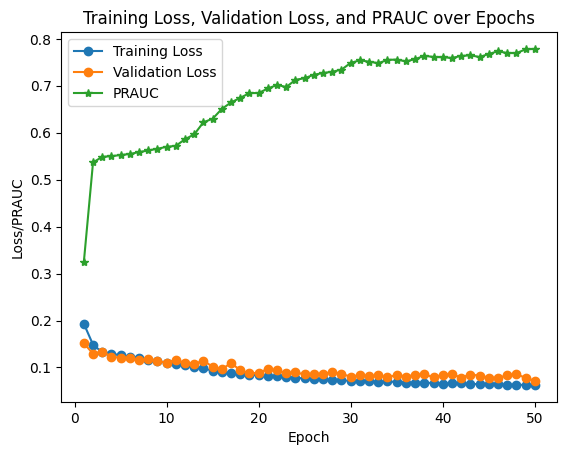

### Inference

In [ ]:
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
print(loss)

In [ ]:
print(y_true.shape)

print(y_true[y_true == 0].shape)
print(y_true[y_true == 1].shape)

In [ ]:
print(y_prob.shape)
print(y_prob.max())
print(y_prob.min())

In [ ]:
print(y_true)
print("------------------")
threshold = 0.5
y_prob_threshold = (y_prob >= threshold).astype(float)
print(y_prob_threshold)
print(y_prob_threshold[y_prob_threshold == 0].shape)
print(y_prob_threshold[y_prob_threshold == 1].shape)

In [ ]:
# risultati
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples", "precision_samples", "recall_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics, threshold=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_true.flatten(), y_prob_threshold.flatten())

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Interpret with HeteroExplainer

In [16]:
from pyhealth.datasets import SampleEHRDataset

# Dizionario per tenere traccia dell'ultima visita per ciascun paziente
last_visit_per_patient = {}

# Iterare attraverso le visite
for visit in test_loader.dataset:
    patient_id = visit['patient_id']
    visit_id = visit['visit_id']

    # Se il paziente è già nel dizionario e la visita corrente è più recente, aggiorna
    if patient_id in last_visit_per_patient:
        if visit_id > last_visit_per_patient[patient_id]['visit_id']:
            last_visit_per_patient[patient_id] = visit
    else:
        # Altrimenti, aggiungi il paziente con la visita corrente
        last_visit_per_patient[patient_id] = visit

explain_dataset = SampleEHRDataset(list(last_visit_per_patient.values()), code_vocs="ATC")

In [17]:
print(f"Test originale: {len(test_ds)}; Test ridotto: {len(explain_dataset)}; Riduzione del {(100 * len(explain_dataset)) / len(test_ds)}%")

Test originale: 191; Test ridotto: 91; Riduzione del 47.64397905759162%


In [30]:
%load_ext autoreload
%autoreload 2

import importlib
import pyhealth.explainer

importlib.reload(pyhealth.explainer)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'pyhealth.explainer' from 'c:\\users\\giuse\\desktop\\msc-thesis-project\\proj_venv\\src\\pyhealth\\pyhealth\\explainer.py'>

In [31]:
from pyhealth.explainer import HeteroGraphExplainer

explainer = HeteroGraphExplainer(
    algorithm="DummyExplainer",
    dataset=test_loader.dataset,
    model=model,
    label_key="medications",
    threshold_value=20,
    top_k=20,
    feat_size=128,
)

In [20]:
patient_visit = explainer.subgraph['patient', 'visit'].edge_index
visit_drug = explainer.subgraph['visit', 'medication'].edge_index

patient_visit = patient_visit.T
visit_drug = visit_drug.T

# Creare un dizionario per tenere traccia del range di indici
index_range_per_patient_visit = {}
max_index = 0

# Iterare attraverso i dati
for pat_vis in patient_visit:
    # print(pat_vis)
    key = f"patient: {pat_vis[0]} - visit: {pat_vis[1]}"
    for vis_drug in visit_drug:
        # print(vis_drug)
        if vis_drug[0] == pat_vis[1]:
            if key in index_range_per_patient_visit:
                # Aggiornare l'indice massimo
                index_range_per_patient_visit[key][1] += 1
            else:
                # Aggiungere al dizionario con il range di indici
                index_range_per_patient_visit[key] = [max_index, max_index]
    max_index = index_range_per_patient_visit[key][1] + 1

# Stampare il range di indici per ciascun paziente
for key, index_range in index_range_per_patient_visit.items():
    print(f"Index range for {key} - n=[{index_range[0]} to {index_range[1]}]")

Index range for patient: 49 - visit: 49 - n=[0 to 23]
Index range for patient: 4 - visit: 4 - n=[24 to 42]
Index range for patient: 84 - visit: 84 - n=[43 to 56]
Index range for patient: 35 - visit: 35 - n=[57 to 79]
Index range for patient: 82 - visit: 82 - n=[80 to 123]
Index range for patient: 83 - visit: 83 - n=[124 to 160]
Index range for patient: 80 - visit: 80 - n=[161 to 201]
Index range for patient: 39 - visit: 39 - n=[202 to 215]
Index range for patient: 38 - visit: 38 - n=[216 to 307]
Index range for patient: 24 - visit: 24 - n=[308 to 345]
Index range for patient: 88 - visit: 88 - n=[346 to 383]
Index range for patient: 30 - visit: 30 - n=[384 to 403]
Index range for patient: 62 - visit: 62 - n=[404 to 471]
Index range for patient: 6 - visit: 6 - n=[472 to 511]
Index range for patient: 18 - visit: 18 - n=[512 to 561]
Index range for patient: 20 - visit: 20 - n=[562 to 591]
Index range for patient: 67 - visit: 67 - n=[592 to 628]
Index range for patient: 12 - visit: 12 - n=[

In [32]:
n=2283
explainer.explain(
    n=n
)

Generated explanations in ['node_mask', 'edge_mask']
Feature importance plot has been saved to './explainability_results/feature_importance_20240201_115833.png'
Edge to predict: tensor([48, 54])
Label to predict: 1
Label predicted: 1 because [0.954176]


In [ ]:
explainer.explain_graph(k=0, human_readable=False)
explainer.explain_graph(k=0, human_readable=True)

In [33]:
explainer.explain_metrics(metrics=["Fidelity", "Fidelity_F1", "Unfaithfulness", "Sparsity"])

Fidelity Positive: 0.17713958024978638
Fidelity Negative: 0.07474017143249512
Fidelity (weighted): 0.29735164286830906
Unfaithfulness Score: 0.08574497699737549
Sparsity Score: 0.8938615918159485


{'Fidelity Positive': 0.1771,
 'Fidelity Negative': 0.0747,
 'Fidelity F1': 0.2974,
 'Unfaithfulness': 0.0857,
 'Sparsity': 0.8939}

In [ ]:
explainer.explain_results(n=n, doctor_type="Internist_Doctor")
explainer.explain_results(n=n)

## Baseline Models

Here we can use the models having the same input built in the previous cells. We tried GRASP, SafeDrug, Transformer, and so on. And evaluate them performance with several metrics.

### RNN

**- RNN without symptoms**

In [7]:
from pyhealth.models import RNN

model_rnn = RNN(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
    mode="multilabel",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_rnn = Trainer(model=model_rnn)
trainer_rnn.train(
    model_name="rnn",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**RNN Results (without symptoms)**

loss: 0.1941
New best pr_auc_samples score (0.5606) at epoch-9, step-510

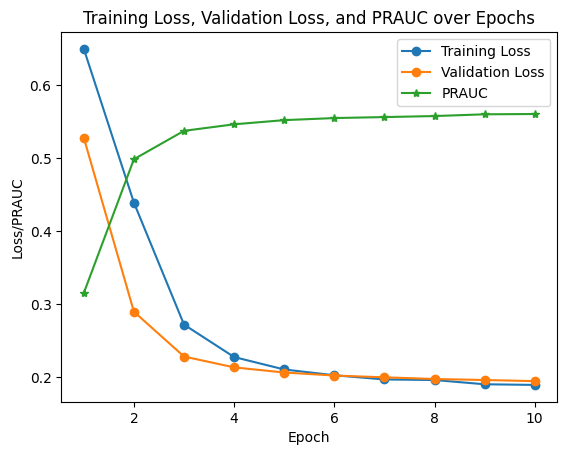

**- RNN Evaluation**

In [9]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_rnn, y_prob_rnn, loss_rnn = trainer_rnn.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_rnn, y_prob_rnn, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 116.67it/s]


{'accuracy': 0.8965680275892758,
 'f1_samples': 0.5191358039326918,
 'pr_auc_samples': 0.650142302838104,
 'jaccard_samples': 0.360480006940703}

**- RNN with symptoms**

In [10]:
from pyhealth.models import RNN

model_rnn_s = RNN(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
    mode="multilabel",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_rnn_s = Trainer(model=model_rnn_s)
trainer_rnn_s.train(
    model_name="rnn",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**RNN Results (with symptoms)**

loss: 0.1742
New best pr_auc_samples score (0.5763) at epoch-9, step-510

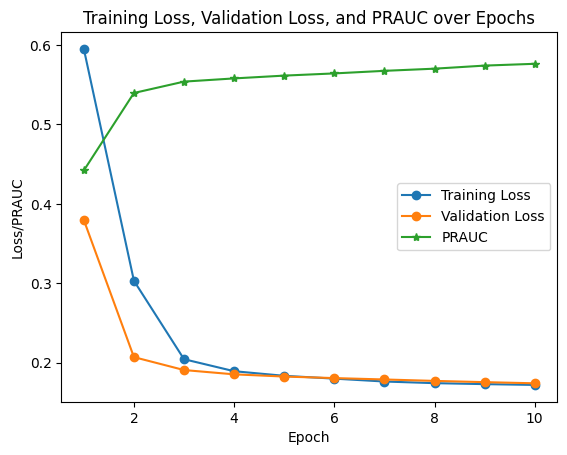

**- RNN Evaluation**

In [12]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_rnn_s, y_prob_rnn_s, loss_rnn_s = trainer_rnn_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_rnn_s, y_prob_rnn_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 86.42it/s]


{'accuracy': 0.9011569696295473,
 'f1_samples': 0.5329832596908064,
 'pr_auc_samples': 0.6633436553585519,
 'jaccard_samples': 0.37531534226610286}

### Transformer

**- Transformer without symptoms**

In [13]:
from pyhealth.models import Transformer

model_tr = Transformer(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
    mode="multilabel",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_tr = Trainer(model=model_tr)
trainer_tr.train(
    model_name="transformer",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**Transformer Results (without symptoms)**

loss: 0.1995
New best pr_auc_samples score (0.5351) at epoch-9, step-510

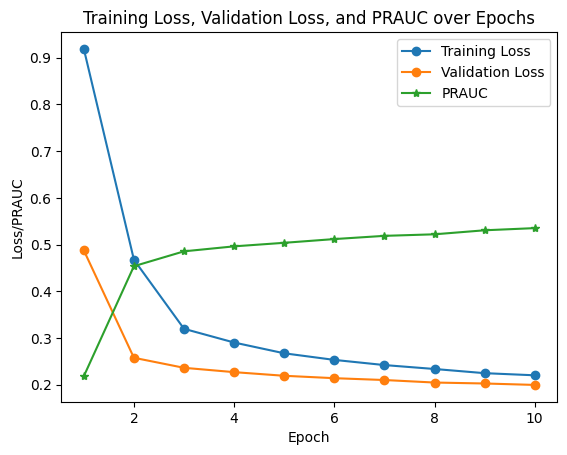

**- Transformer Evaluation**

In [15]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_tr, y_prob_tr, loss_tr = trainer_tr.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_tr, y_prob_tr, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 43.21it/s]


{'accuracy': 0.8912003559906553,
 'f1_samples': 0.5139069711766077,
 'pr_auc_samples': 0.619056922816739,
 'jaccard_samples': 0.35616655470043834}

**- Transformer with symptoms**

In [16]:
from pyhealth.models import Transformer

model_tr_s = Transformer(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
    mode="multilabel",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_tr_s = Trainer(model=model_tr_s)
trainer_tr_s.train(
    model_name="transformer",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**Transformer Results (with symptoms)**

loss: 0.1959
New best pr_auc_samples score (0.5530) at epoch-9, step-510

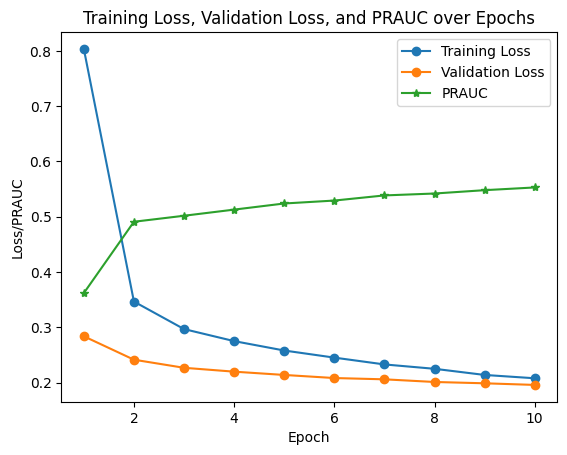

**- Transformer Evaluation**

In [18]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_tr_s, y_prob_tr_s, loss_tr_s = trainer_tr_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_tr_s, y_prob_tr_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 38.89it/s]


{'accuracy': 0.8944821448436978,
 'f1_samples': 0.5228339322620008,
 'pr_auc_samples': 0.6387211254397213,
 'jaccard_samples': 0.36546559602053724}

### SafeDrug

**- SafeDrug without symptoms**

In [19]:
from pyhealth.models import SafeDrug

model_safe = SafeDrug(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_safe = Trainer(model=model_safe)
trainer_safe.train(
    model_name="safedrug",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**SafeDrug Results (without symptoms)**

loss: 0.2631
New best pr_auc_samples score (0.6426) at epoch-9, step-510

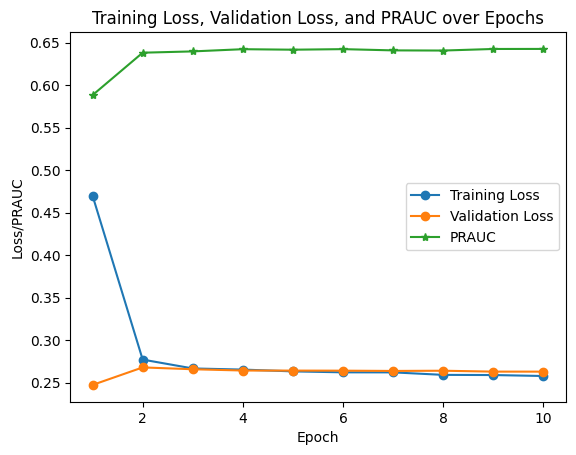

**- SafeDrug Evaluation**

In [21]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_safe, y_prob_safe, loss_safe = trainer_safe.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_safe, y_prob_safe, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


{'accuracy': 0.8935921682055846,
 'f1_samples': 0.4799128219377393,
 'pr_auc_samples': 0.6317901136528216,
 'jaccard_samples': 0.3247374452826242}

**- SafeDrug with symptoms**

In [22]:
from pyhealth.models import SafeDrug

model_safe_s = SafeDrug(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_safe_s = Trainer(model=model_safe_s)
trainer_safe_s.train(
    model_name="safedrug",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**SafeDrug Results (with symptoms)**

loss: 0.2640
New best pr_auc_samples score (0.6477) at epoch-7, step-408

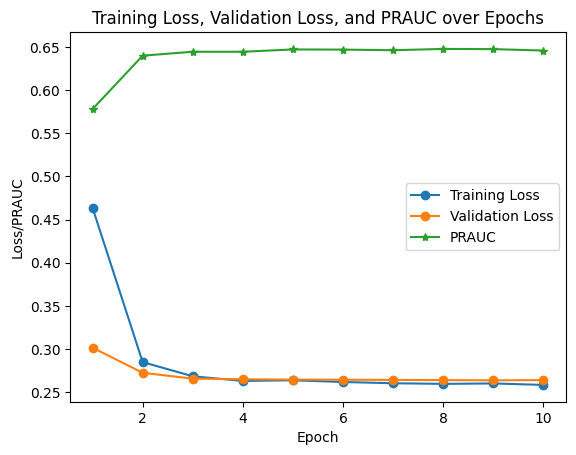

**SafeDrug Evaluation**

In [24]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_safe_s, y_prob_safe_s, loss_safe_s = trainer_safe_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_safe_s, y_prob_safe_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


{'accuracy': 0.8940371565246412,
 'f1_samples': 0.47729432851886344,
 'pr_auc_samples': 0.6323354697324408,
 'jaccard_samples': 0.3223972380135409}

### GAMENet

**- GAMENet without symptoms**

In [25]:
from pyhealth.models import GAMENet

model_game = GAMENet(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_game = Trainer(model=model_game)
trainer_game.train(
    model_name="gamenet",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**GAMENet Results (without symptoms)**

loss: 0.2696
New best pr_auc_samples score (0.6411) at epoch-8, step-459

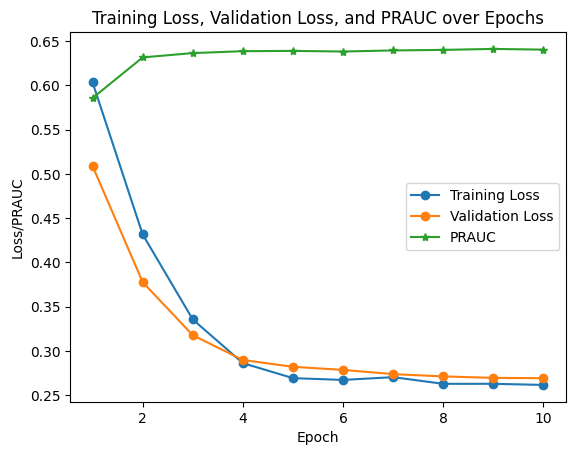

**- GAMENet Evaluation**

In [27]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_game, y_prob_game, loss_game = trainer_game.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_game, y_prob_game, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 70.71it/s]


{'accuracy': 0.8936199799755257,
 'f1_samples': 0.4769334560619558,
 'pr_auc_samples': 0.6309796867729162,
 'jaccard_samples': 0.3221964397546095}

**- GAMENet with symptoms**

In [28]:
from pyhealth.models import GAMENet

model_game_s = GAMENet(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_game_s = Trainer(model=model_game_s)
trainer_game_s.train(
    model_name="gamenet",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**GAMENet Results (with symptoms)**

loss: 0.2682
New best pr_auc_samples score (0.6411) at epoch-8, step-459

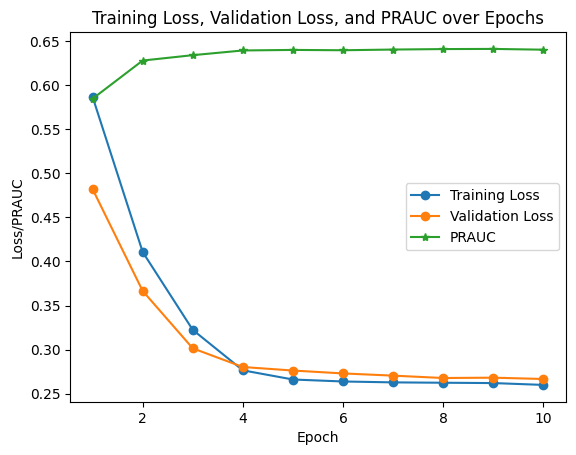

**GAMENet Evaluation**

In [30]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_game_s, y_prob_game_s, loss_game_s = trainer_game_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_game_s, y_prob_game_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 72.15it/s]


{'accuracy': 0.8942318389142285,
 'f1_samples': 0.48071149072260616,
 'pr_auc_samples': 0.6329302151836249,
 'jaccard_samples': 0.3255527183258041}

### GRASP (NOT WORKS FOR MEDICATIONS RECOMMENDATION)

**- GRASP without symptoms**

In [13]:
from pyhealth.models import GRASP

model_grasp = GRASP(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
    use_embedding=[True, True],
    mode="multilabel",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_grasp = Trainer(model=model_grasp)
trainer_grasp.train(
    model_name="grasp",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**GRASP Results (without symptoms)**

loss: 0.xxxx
New best pr_auc_samples score (0.xxxx) at epoch-x, step-xxx

**- GRASP Evaluation**

In [ ]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_grasp, y_prob_grasp, loss_grasp = trainer_grasp.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_grasp, y_prob_grasp, metrics=metrics)

**- GRASP with symptoms**

In [20]:
from pyhealth.models import GRASP

model_grasp_s = GRASP(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
    use_embedding=[True, True, True],
    mode="multilabel",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_grasp_s = Trainer(model=model_grasp_s)
trainer_grasp_s.train(
    model_name="grasp",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**GRASP Results (with symptoms)**

loss: 0.xxxx
New best pr_auc_samples score (0.xxxx) at epoch-x, step-xxx

**GRASP Evaluation**

In [ ]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_grasp_s, y_prob_grasp_s, loss_grasp_s = trainer_grasp_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_grasp_s, y_prob_grasp_s, metrics=metrics)

### RETAIN

**- RETAIN without symptoms**

In [31]:
from pyhealth.models import RETAIN

model_retain = RETAIN(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
    mode="multilabel",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_retain = Trainer(model=model_retain)
trainer_retain.train(
    model_name="retain",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**RETAIN Results (without symptoms)**

loss: 0.2999
New best pr_auc_samples score (0.6474) at epoch-9, step-510

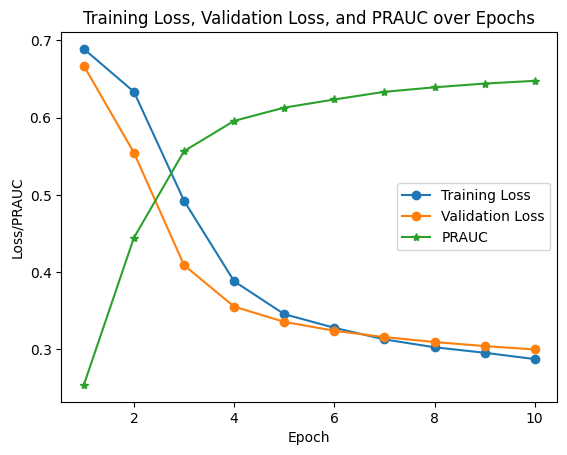

**- RETAIN Evaluation**

In [33]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_retain, y_prob_retain, loss_retain = trainer_retain.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_retain, y_prob_retain, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 55.99it/s]


{'accuracy': 0.8948436978529314,
 'f1_samples': 0.5281752613700492,
 'pr_auc_samples': 0.6433994977644366,
 'jaccard_samples': 0.37059068196064454}

**- RETAIN with symptoms**

In [34]:
from pyhealth.models import RETAIN

model_retain_s = RETAIN(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
    mode="multilabel",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_retain_s = Trainer(model=model_retain_s)
trainer_retain_s.train(
    model_name="retain",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**RETAIN Results (with symptoms)**

loss: 0.2677
New best pr_auc_samples score (0.6681) at epoch-9, step-510

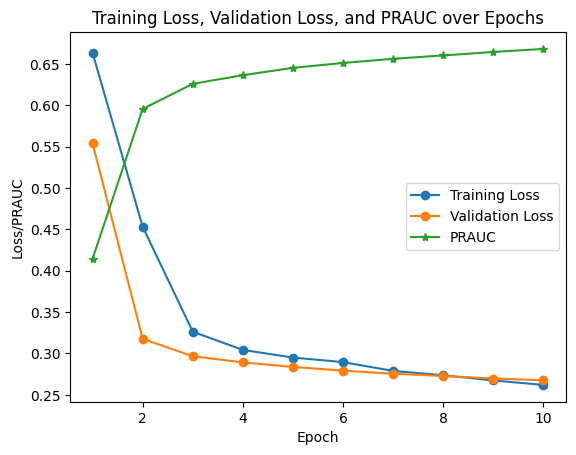

**RETAIN Evaluation**

In [36]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_retain_s, y_prob_retain_s, loss_retain_s = trainer_retain_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_retain_s, y_prob_retain_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 57.38it/s]


{'accuracy': 0.9002391812214929,
 'f1_samples': 0.5372509488484144,
 'pr_auc_samples': 0.6632249734770583,
 'jaccard_samples': 0.37993752692087424}

### MICRON

**- MICRON without symptoms**

In [37]:
from pyhealth.models import MICRON

model_micron = MICRON(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_micron = Trainer(model=model_micron)
trainer_micron.train(
    model_name="micron",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**MICRON Results (without symptoms)**

loss: 0.2727
New best pr_auc_samples score (0.6665) at epoch-9, step-500

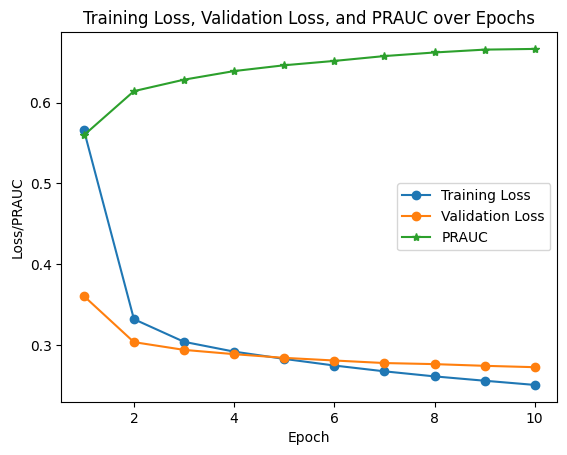

**- MICRON Evaluation**

In [39]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_micron, y_prob_micron, loss_micron = trainer_micron.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_micron, y_prob_micron, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 126.88it/s]


{'accuracy': 0.8884748025364334,
 'f1_samples': 0.5359780216472592,
 'pr_auc_samples': 0.6506334390240331,
 'jaccard_samples': 0.37877685360082847}

**- MICRON with symptoms**

In [40]:
from pyhealth.models import MICRON

model_micron_s = MICRON(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_micron_s = Trainer(model=model_micron_s)
trainer_micron_s.train(
    model_name="micron",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**MICRON Results (with symptoms)**

loss: 0.2676
New best pr_auc_samples score (0.6946) at epoch-8, step-459

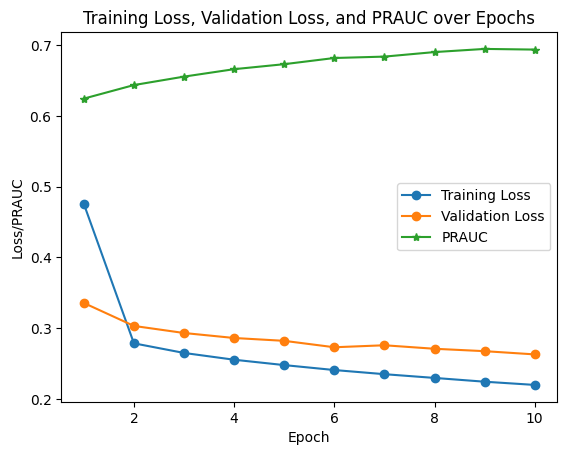

**MICRON Evaluation**

In [42]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_micron_s, y_prob_micron_s, loss_micron_s = trainer_micron_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_micron_s, y_prob_micron_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00, 134.61it/s]


{'accuracy': 0.9050784291912337,
 'f1_samples': 0.560547721862238,
 'pr_auc_samples': 0.6825147519987713,
 'jaccard_samples': 0.4044750531468177}

### MoleRec

**- MoleRec without symptoms**

In [48]:
from pyhealth.models import MoleRec

model_molerec = MoleRec(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures"],
    label_key="medications",
)

**- Training without symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_molerec = Trainer(model=model_molerec)
trainer_molerec.train(
    model_name="molerec",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**MoleRec Results (without symptoms)**

loss: 0.6719
New best pr_auc_samples score (0.3511) at epoch-9, step-510

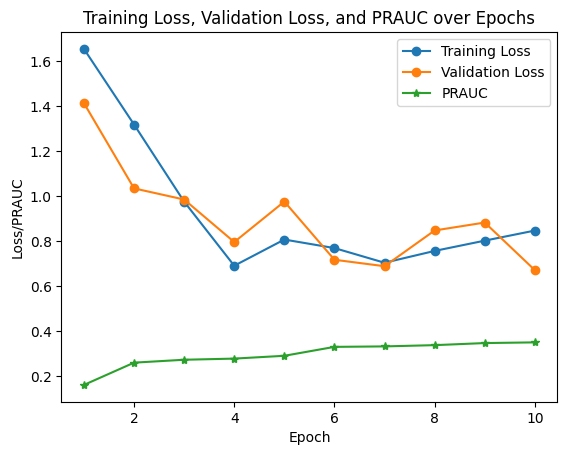

**- MoleRec Evaluation**

In [50]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_molerec, y_prob_molerec, loss_molerec = trainer_molerec.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_molerec, y_prob_molerec, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00,  9.90it/s]


{'accuracy': 0.8940649682945823,
 'f1_samples': 0.4910521968570858,
 'pr_auc_samples': 0.3663806681805927,
 'jaccard_samples': 0.33483568237985833}

**- MoleRec with symptoms**

In [51]:
from pyhealth.models import MoleRec

model_molerec_s = MoleRec(
    dataset=mimic3sample,
    feature_keys=["diagnosis", "procedures", "symptoms"],
    label_key="medications",
)

**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_molerec_s = Trainer(model=model_molerec_s)
trainer_molerec_s.train(
    model_name="molerec",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**MoleRec Results (with symptoms)**

loss: 0.8862
New best pr_auc_samples score (0.3449) at epoch-9, step-510

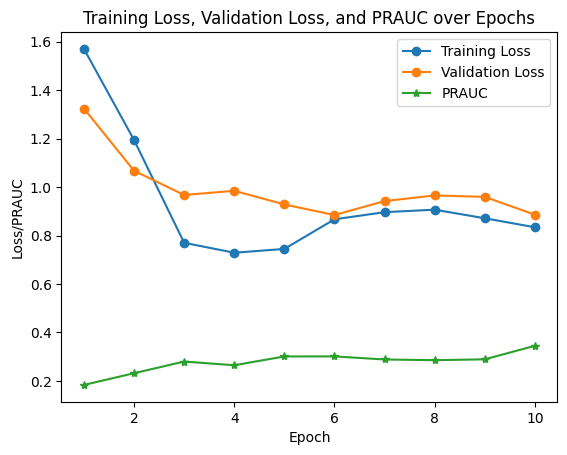

**MoleRec Evaluation**

In [53]:
from pyhealth.metrics import multilabel_metrics_fn

y_true_molerec_s, y_prob_molerec_s, loss_molerec_s = trainer_molerec_s.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true_molerec_s, y_prob_molerec_s, metrics=metrics)

Evaluation: 100%|██████████| 7/7 [00:00<00:00,  9.20it/s]


{'accuracy': 0.8924796974079431,
 'f1_samples': 0.5099994539957666,
 'pr_auc_samples': 0.3722004441177325,
 'jaccard_samples': 0.35187002432019887}

## Let'see some recommendation...

In [ ]:
import numpy as np
import pandas as pd
from pyhealth.medcode import InnerMap

# initialize an InnerMap
atc = InnerMap.load("ATC")

sorted_indices = []
for i in range(len(y_prob)):
    top_indices = np.argsort(y_prob[i, :])[::-1][:10]
    sorted_values = y_prob[i, top_indices]
    sorted_indices.append(top_indices)

patient_ids = []
visit_ids = []
rec_drug = []

# get the list of all drugs in the dataset
list_drugs = mimic3sample.get_all_tokens('drugs')

# iterate over the top indexes for each sample in test_ds
for sample, top in zip(test_ds, sorted_indices):
   
    # append the patient id and visit id to their respective lists
    patient_ids.append(sample['patient_id'])
    visit_ids.append(sample['visit_id'])
   
    # create an empty list to store the recommended drugs for this sample
    sample_rec_drug = []
   
    # iterate over the top indexes for this sample
    for i in top:
       
        # append the drug at the i-th index to the recommended drugs list for this sample
        sample_rec_drug.append(list_drugs[i])
   
    # append the recommended drugs for this sample to the recommended drugs list
    rec_drug.append(sample_rec_drug)

# create a dataframe with the patient ids, visit ids, and recommended drugs
df_rec_drug = pd.DataFrame({'patient_id': patient_ids, 'visit_id': visit_ids, 'rec_drug': rec_drug})
df_rec_drug

In [125]:
from pyhealth.medcode import InnerMap

# initialize an InnerMap
atc = InnerMap.load("ATC")

# select a patient from df_rec_drug
patient_id = 10884
visit_id = 150905
patient_df = df_rec_drug[df_rec_drug['patient_id'].astype(int)==patient_id]
patient_df = patient_df[patient_df['visit_id'].astype(int)==visit_id]

# iterate over the recommended drugs for the selected patient
for drugs in patient_df['rec_drug']:
    # lookup the ATC code for each drug and print it
    for drug in drugs:
        print(f"{drug}: {atc.lookup(drug)}")

B05XA: Electrolyte solutions
N03AX: Other antiepileptics in ATC
M04AC: Preparations with no effect on uric acid metabolism
M03BA: Carbamic acid esters, centrally acting muscle relaxants
G04CA: Alpha-adrenoreceptor antagonists, benign prostatic hypertrophy
J01EE: Combinations of sulfonamides and trimethoprim, incl. derivatives
N02BE: Anilide analgesics and antipyretics
B01AB: Heparin group antithrombotic drugs
N05CF: Benzodiazepine related hypnotics and sedatives
A02BC: Proton pump inhibitors for peptic ulcer and GORD


In [124]:
from pyhealth.medcode import InnerMap

# select a patient from df_rec_drug
patient_id = 10884
visit_id = 150905

for sample in test_ds:
    if (sample['patient_id'] == str(patient_id)) and (sample['visit_id'] == str(visit_id)):
        conditions = sample['conditions']
        procedures = sample['procedures']
        symptoms = sample['symptoms']

# initialize an InnerMap
icd9cm = InnerMap.load("ICD9CM")
i=0
for condition in conditions:
    for code in condition:
        print(f"Condition {i}: {icd9cm.lookup(code)}")
        i+=1

# initialize an InnerMap
icd9pr = InnerMap.load("ICD9PROC")
i=0
for procedure in procedures:
    for code in procedure:
        print(f"Procedure {i}: {icd9pr.lookup(code)}")
        i+=1

i=0
for symptom in symptoms:
    for code in symptom:
        print(f"Symptom {i}: {icd9cm.lookup(code)}")
        i+=1

Condition 0: Acute and subacute necrosis of liver
Condition 1: Alcoholic cirrhosis of liver
Condition 2: Hepatorenal syndrome
Condition 3: Acute kidney failure with lesion of tubular necrosis
Condition 4: Congestive heart failure, unspecified
Condition 5: Hyposmolality and/or hyponatremia
Condition 6: Chronic kidney disease, unspecified
Condition 7: Toxic encephalopathy
Condition 8: Hepatic encephalopathy
Condition 9: Calculus of gallbladder with other cholecystitis, without mention of obstruction
Condition 10: Ascites
Condition 11: Acquired coagulation factor deficiency
Condition 12: Thrombocytopenia, unspecified
Condition 13: Unspecified essential hypertension
Condition 14: Other specified disorders of pancreatic internal secretion
Condition 15: Adrenal cortical steroids causing adverse effects in therapeutic use
Condition 16: Acute alcoholic intoxication in alcoholism, in remission
Condition 17: Esophageal reflux
Condition 18: Personal history of urinary calculi
Condition 19: Aphasi